### Sobel Filter for Edge Detection (Gradient Based Edge Detection Operator)

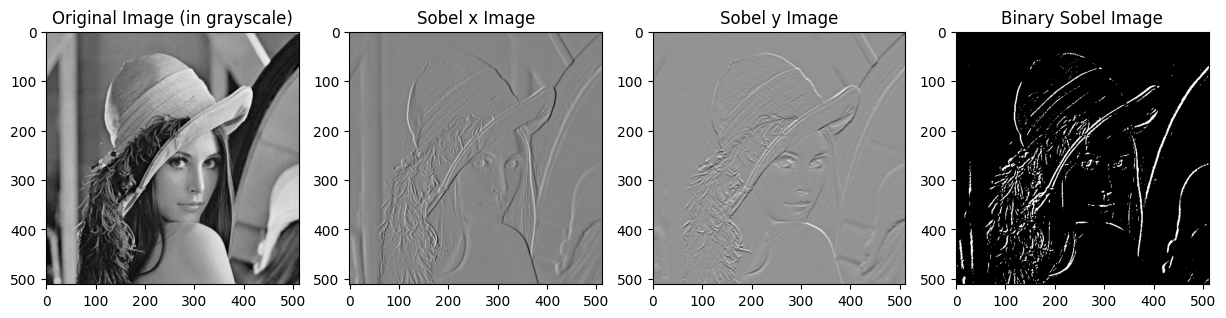

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('../images/Lenna.png',0)

'''
cv2.Sobel(src: Matrix, ddepth: int, dx: int, dy: int, dst: , ksize: int , scale: float, delta: float, borderType: int)

src: input image.
dst: output image of the same size and the same number of channels as src .
ddepth: output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives.
dx: order of the derivative x.
dy: order of the derivative y.
ksize: size of the extended Sobel kernel; it must be 1, 3, 5, or 7.
scale: optional scale factor for the computed derivative values; by default, no scaling is applied (see getDerivKernels for details).
delta: optional delta value that is added to the results prior to storing them in dst.
borderType: pixel extrapolation method, see BorderTypes. BORDER_WRAP is not supported.
'''

sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# cv2.add(): combines the image of same size
combined_sobel = cv2.add(sobelx, sobely)

thresh, binary_sobel = cv2.threshold(combined_sobel, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15,8))
plt.subplot(1,4,1), plt.imshow(image, cmap='gray'), plt.title('Original Image (in grayscale)')
plt.subplot(1,4,2), plt.imshow(sobelx, cmap='gray'), plt.title('Sobel x Image')
plt.subplot(1,4,3), plt.imshow(sobely, cmap='gray'), plt.title('Sobel y Image')
plt.subplot(1,4,4), plt.imshow(binary_sobel, cmap='gray'), plt.title('Binary Sobel Image')
plt.show()

In [2]:
image1 = cv2.imread('../images/Lenna.png')
image2 = cv2.imread('../images/sun.png')

new_image = cv2.add(image1, image2) # Condition: Images should be of same size, here it is 512 x 512

cv2.imshow('Added Image', new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Canny Edge Detector (Gaussian Based Edge Detection Operator)

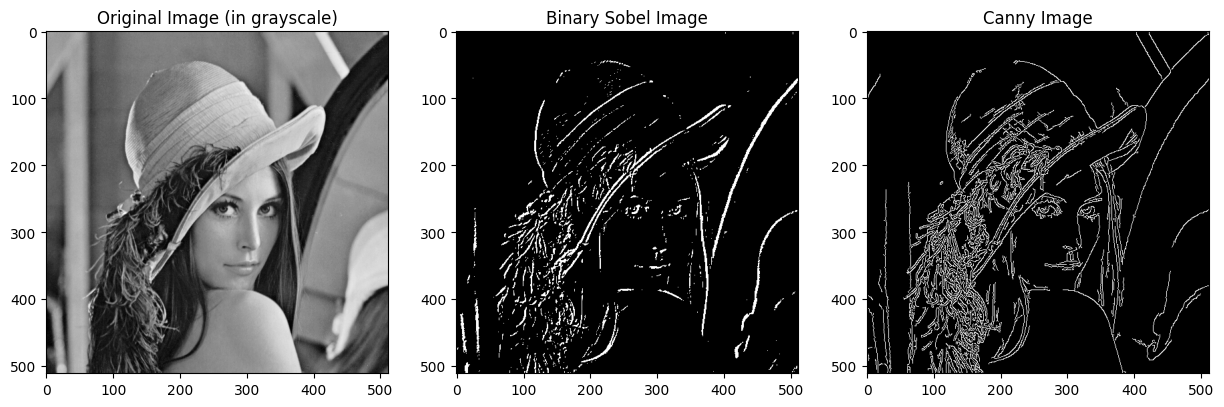

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('../images/Lenna.png',0)

'''
def Canny(image: cv2.typing.MatLike, threshold1: float, threshold2: float, edges: cv2.typing.MatLike | None = ..., apertureSize: int = ..., L2gradient: bool = ...)


image: 8-bit input image.
edges: output edge map; single channels 8-bit image, which has the same size as image .
threshold1: first threshold for the hysteresis procedure.
threshold2: second threshold for the hysteresis procedure.
apertureSize: aperture size for the Sobel operator.
L2gradient: a flag, indicating whether a more accurate L2-norm = sqrt((dI/dx)**2 + (dI/dy)**2) should be used to calculate the image gradient magnitude ( L2gradient=true ), or whether the default L1 norm = (|dI/dx|+|dI/dy|) is enough ( L2gradient=false ).
 
'''
edges = cv2.Canny(image, 50, 150) # Canny uses NMS (Non-max Suppression)

plt.figure(figsize=(15,8))
plt.subplot(1,3,1), plt.imshow(image, cmap='gray'), plt.title('Original Image (in grayscale)')
plt.subplot(1,3,2), plt.imshow(binary_sobel, cmap='gray'), plt.title('Binary Sobel Image')
plt.subplot(1,3,3), plt.imshow(edges, cmap='gray'), plt.title('Canny Image')
plt.show()

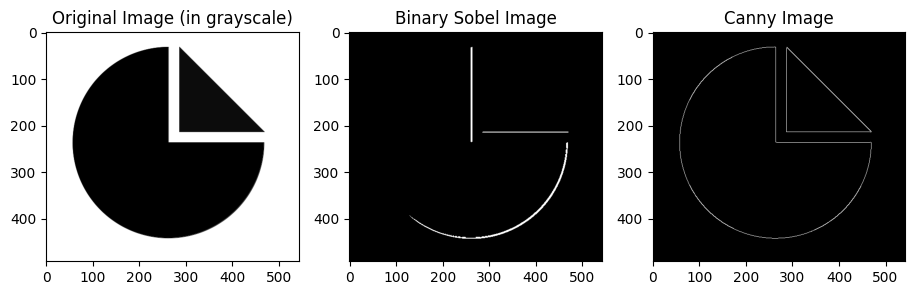

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('../images/circle.png', 0)

sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

combined_sobel = cv2.add(sobelx, sobely)

thresh, binary_sobel = cv2.threshold(combined_sobel, 100, 255, cv2.THRESH_BINARY)

edges = cv2.Canny(image, 50, 150)

plt.figure(figsize=(15,8))
plt.subplot(1,4,1), plt.imshow(image, cmap='gray'), plt.title('Original Image (in grayscale)')
plt.subplot(1,4,2), plt.imshow(binary_sobel, cmap='gray'), plt.title('Binary Sobel Image')
plt.subplot(1,4,3), plt.imshow(edges, cmap='gray'), plt.title('Canny Image')
plt.show()

### Harris Corner Detection

(<Axes: title={'center': 'Harris Corner Detection'}>,
 Text(0.5, 1.0, 'Harris Corner Detection'))

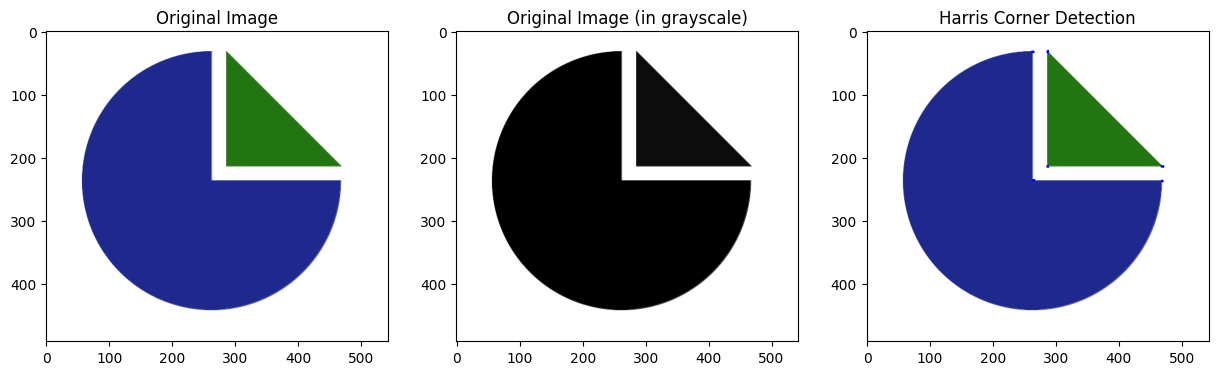

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gray = cv2.imread('../images/circle.png', 0) # If not used 0 then it will give BGR image
original_image = cv2.imread('../images/circle.png')

plt.figure(figsize=(15,8))
plt.subplot(1,3,1), plt.imshow(original_image, cmap='gray'), plt.title('Original Image')

'''
def cornerHarris(src: cv2.typing.MatLike, blockSize: int, ksize: int, k: float, dst: cv2.typing.MatLike | None = ..., borderType: int = ...) -> cv2.typing.MatLike: ...


src: Input single-channel 8-bit or floating-point image.
dst: Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
blockSize: Neighborhood size (see the details on cornerEigenValsAndVecs ).
ksize: Aperture parameter for the Sobel operator.
k: Harris detector free parameter. See the formula above.
borderType: Pixel extrapolation method. See BorderTypes. BORDER_WRAP is not supported.
'''

gray = np.float32(gray)

dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

'''
def dilate(src: cv2.typing.MatLike, kernel: cv2.typing.MatLike, dst: cv2.typing.MatLike | None = ..., anchor: cv2.typing.Point = ..., iterations: int = ..., borderType: int = ..., borderValue: cv2.typing.Scalar = ...) -> cv2.typing.MatLike: ...

src: input image; the number of channels can be arbitrary, but the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
dst: output image of the same size and type as src.
kernel: structuring element used for dilation; if element=Mat(), a 3 x 3 rectangular structuring element is used. Kernel can be created using getStructuringElement
anchor: position of the anchor within the element; default value (-1, -1) means that the anchor is at the element center.
iterations: number of times dilation is applied.
borderType: pixel extrapolation method, see BorderTypes. BORDER_WRAP is not suported.
borderValue: border value in case of a constant border
'''

dst = cv2.dilate(dst, None)

original_image[dst > 0.01 * dst.max()] = [0,0,255] # RGB Channel

plt.subplot(1,3,2), plt.imshow(gray, cmap='gray'), plt.title('Original Image (in grayscale)')
plt.subplot(1,3,3), plt.imshow(original_image, cmap='gray'), plt.title('Harris Corner Detection')

(<Axes: title={'center': 'Harris Corner Detection'}>,
 Text(0.5, 1.0, 'Harris Corner Detection'))

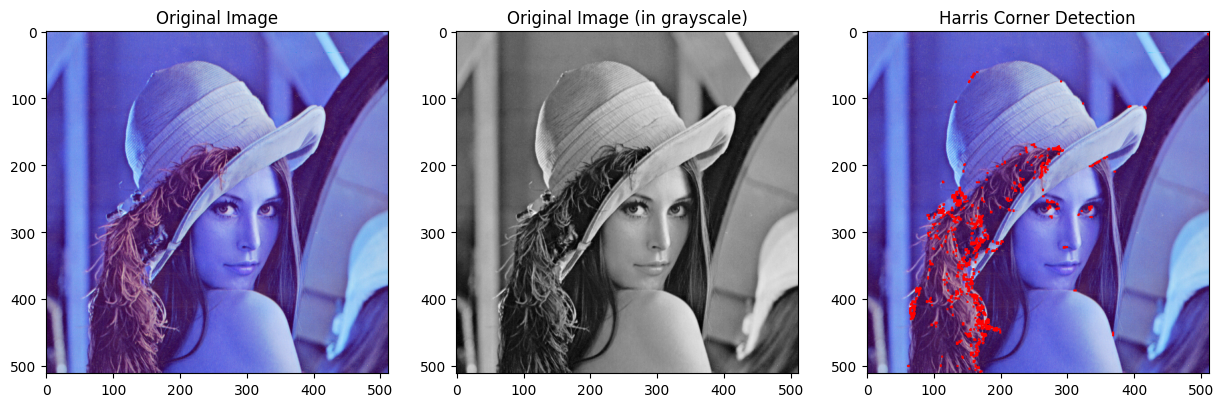

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gray = cv2.imread('../images/Lenna.png', 0) # If not used 0 then it will give BGR image
original_image = cv2.imread('../images/Lenna.png')

plt.figure(figsize=(15,8))
plt.subplot(1,3,1), plt.imshow(original_image, cmap='gray'), plt.title('Original Image')

gray = np.float32(gray)

dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

dst = cv2.dilate(dst, None)

original_image[dst > 0.01 * dst.max()] = [255,0,0] # RGB Channel

plt.subplot(1,3,2), plt.imshow(gray, cmap='gray'), plt.title('Original Image (in grayscale)')
plt.subplot(1,3,3), plt.imshow(original_image, cmap='gray'), plt.title('Harris Corner Detection')